<a href="https://colab.research.google.com/github/pontofio/Cours/blob/main/Copie_de_Notebook_0_Introduction_Metriques_Etudiant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Mise en pratique avec Python
## Notebook 0 – Introduction & Métriques de performance
👨‍🏫 Professeur : Dr. Khalil HADDAOUI  


---

**Objectifs**  
- Comprendre l'apprentissage supervisé (régression vs classification).  
- Savoir choisir une *métrique adaptée au problème*.  
- Implémenter et interpréter MAE, RMSE, R², Accuracy, Precision, Recall, F1, ROC-AUC.

> 🔧 Bibliothèques utilisées : `numpy`, `matplotlib`, `scikit-learn` (pour la matrice de confusion uniquement).


## 🌍 Pourquoi les métriques ?
Un modèle produit des prédictions : **comment juger** si elles sont bonnes ?  
Les **métriques** sont nos *thermomètres*. On ne prend pas la température avec un pèse-personne :  
> **On n'évalue pas toutes les tâches avec la même métrique.**

## 📐 Régression : MAE, RMSE, R²
- **MAE** (erreur absolue moyenne) :  
$$
\mathrm{MAE}=\frac{1}{n}\sum_{i=1}^n |y_i-\hat y_i|
$$
→ "En moyenne, je me trompe de X unités." (interprétable, robuste aux grosses erreurs isolées)

- **RMSE** (racine de l'erreur quadratique moyenne) :  
$$
\mathrm{RMSE}=\sqrt{\frac{1}{n}\sum_{i=1}^n (y_i-\hat y_i)^2}
$$
→ Pénalise **fort** les grosses erreurs (utile si une grosse erreur coûte cher).

- **R²** (variance expliquée) :  
$$
R^2=1-\frac{\sum_i (y_i-\hat y_i)^2}{\sum_i (y_i-\bar y)^2}
$$
→ Proportion de la variance expliquée (0 à 1, peut être négatif si très mauvais).

## 📊 Classification : Accuracy, Precision, Recall, F1, ROC-AUC
- **Accuracy** : part de prédictions correctes.  
$$
\mathrm{Acc}=\frac{VP+VN}{VP+VN+FP+FN}
$$
⚠️ **Trompeur si classes déséquilibrées**.

- **Precision** (qualité des positifs prédits) :  
$$
\mathrm{Prec}=\frac{VP}{VP+FP}
$$
→ "Parmi les *alertes*, combien sont de vraies alertes ?" (banque : éviter de bloquer des innocents).

- **Recall** (couverture des vrais positifs) :  
$$
\mathrm{Rec}=\frac{VP}{VP+FN}
$$
→ "Parmi les malades, combien ai-je détectés ?" (santé : **réduire faux négatifs**).

- **F1** (compromis) :  
$$
F1=\frac{2\cdot \mathrm{Prec}\cdot \mathrm{Rec}}{\mathrm{Prec}+\mathrm{Rec}}
$$

- **ROC-AUC** : qualité globale toutes coupures de seuil (1 parfait, 0.5 aléatoire).


**Exemple jouet pour messurer les performance d'un modele de regression**

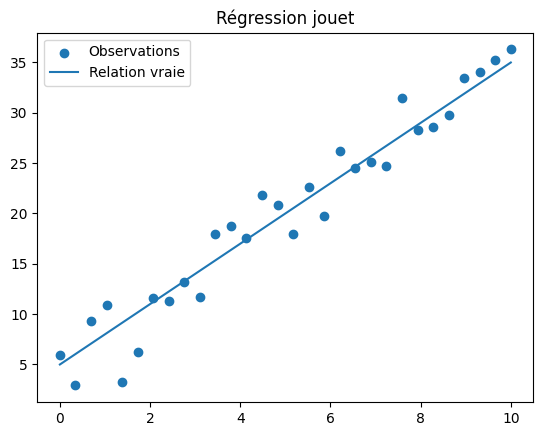

In [ ]:
# Jeu jouet de régression : droite + bruit
import numpy as np, matplotlib.pyplot as plt
rng = np.random.default_rng(42)
X = np.linspace(0, 10, 30)
y_true = 3*X + 5
y = y_true + rng.normal(0, 3, size=X.size) #on imagine que c'est le modele de régression (y represente les prédictions)

plt.scatter(X, y, label="Observations")
plt.plot(X, y_true, label="Relation vraie")
plt.title("Régression jouet")
plt.legend(); plt.show()


In [ ]:
# TODO: implémenter MAE, RMSE, R2 (sans sklearn)
import numpy as np
#y : c 'est la vrai valeur et yhat c'est la prédiction
def mae(y, yhat):
    val = np.mean(np.abs(y - yhat))
    return val

def rmse(y, yhat):
    val = np.sqrt(np.mean((y - yhat)**2))
    return val

def r2(y, yhat):
    numerateur = np.sum((y-yhat)**2)
    denominateur = np.sum((y-np.mean(y))**2)
    val = 1. - numerateur/denominateur
    return val

yhat_baseline = np.full_like(y, y.mean())
print("Baseline (constante): MAE=", mae(y, yhat_baseline), "RMSE=", rmse(y, yhat_baseline), "R2=", r2(y, yhat_baseline))

# Un prédicteur linéaire naïf (on suppose connaître la vraie pente ici pour l'exemple)
yhat_lin = 3*X + 5
print("Linéaire naïf: MAE=", mae(y, yhat_lin), "RMSE=", rmse(y, yhat_lin), "R2=", r2(y, yhat_lin))


Baseline (constante): MAE= 8.154368973855032 RMSE= 9.65114554017318 R2= 0.0
Linéaire naïf: MAE= 1.8800764057323496 RMSE= 2.2916358248731528 R2= 0.9436189089154419


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

hat_baseline = np.full_like(y, y.mean())
print("Baseline (constante): MAE=", mean_absolute_error(y, yhat_baseline), "RMSE=", np.sqrt(mean_squared_error(y, yhat_baseline)), "R2=",  r2_score(y, yhat_baseline))

# Un prédicteur linéaire naïf (on suppose connaître la vraie pente ici pour l'exemple)
yhat_lin = 3*X + 5
print("Linéaire naïf: MAE=", mean_absolute_error(y, yhat_lin), "RMSE=", np.sqrt(mean_squared_error(y, yhat_lin)), "R2=", r2_score(y, yhat_lin))



Baseline (constante): MAE= 8.154368973855032 RMSE= 9.65114554017318 R2= 0.0
Linéaire naïf: MAE= 1.8800764057323496 RMSE= 2.2916358248731528 R2= 0.9436189089154419


**Exemple jouet pour messurer les performance d'un modele de classification**

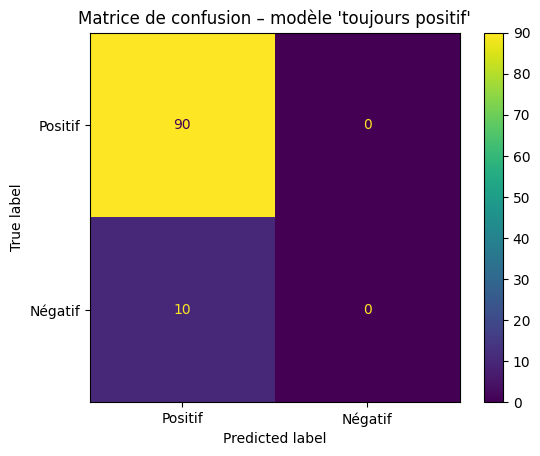

Accuracy trompeuse: 0.9


In [ ]:
# Jeu jouet déséquilibré pour montrer les limites de l'accuracy
import numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = [1]*90 + [0]*10  # 90 positifs (malades), 10 négatifs (sains)
y_pred = [1]*100          # modèle idiot: toujours positif

cm = confusion_matrix(y_true, y_pred, labels=[1,0])  # ordre [Positif, Négatif]
disp = ConfusionMatrixDisplay(cm, display_labels=["Positif","Négatif"])
disp.plot(); plt.title("Matrice de confusion – modèle 'toujours positif'"); plt.show()

VP = cm[0,0]; FN = cm[0,1]
FP = cm[1,0]; VN = cm[1,1]

acc = (VP+VN)/np.sum(cm)
print("Accuracy trompeuse:", acc)


In [ ]:
# TODO: calculer précision, rappel et F1 à la main
precision = VP/(VP + FP) if (VP+FP)>0 else 0.0
recall = VP/(VP+ FN) if (VP +FN)> 0 else 0.0
f1 = (2*precision*recall/(precision+recall)) if (precision+recall)>0 else 0.0

print("Precision =", precision)
print("Recall    =", recall)
print("F1        =", f1)


Precision = 0.9
Recall    = 1.0
F1        = 0.9473684210526316


In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

precision = precision_score(y_true,y_pred)
recall =  recall_score(y_true,y_pred)
F1 = f1_score(y_true,y_pred)

print ("Precision = " , precision)
print ("Recall = " , recall)
print ("F1 = " , F1)

Precision =  0.9
Recall =  1.0
F1 =  0.9473684210526315


In [ ]:
from sklearn.metrics import classification_report
print("Rapport complet : ", classification_report(y_true,y_pred))

Rapport complet :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.90      1.00      0.95        90

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ✅ À retenir
- Choisir la métrique selon le **coût des erreurs**.
- Régression : **MAE** (simple), **RMSE** (forte pénalisation), **R²** (variance expliquée).
- Classification : **Precision/Recall/F1** > Accuracy quand **déséquilibré**.
